In [1]:
print('Hello World')

Hello World


In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()


In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [4]:
housing = load_housing_data()

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()
#print(housing["income_cat"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8C39630B8>,
      dtype=object)

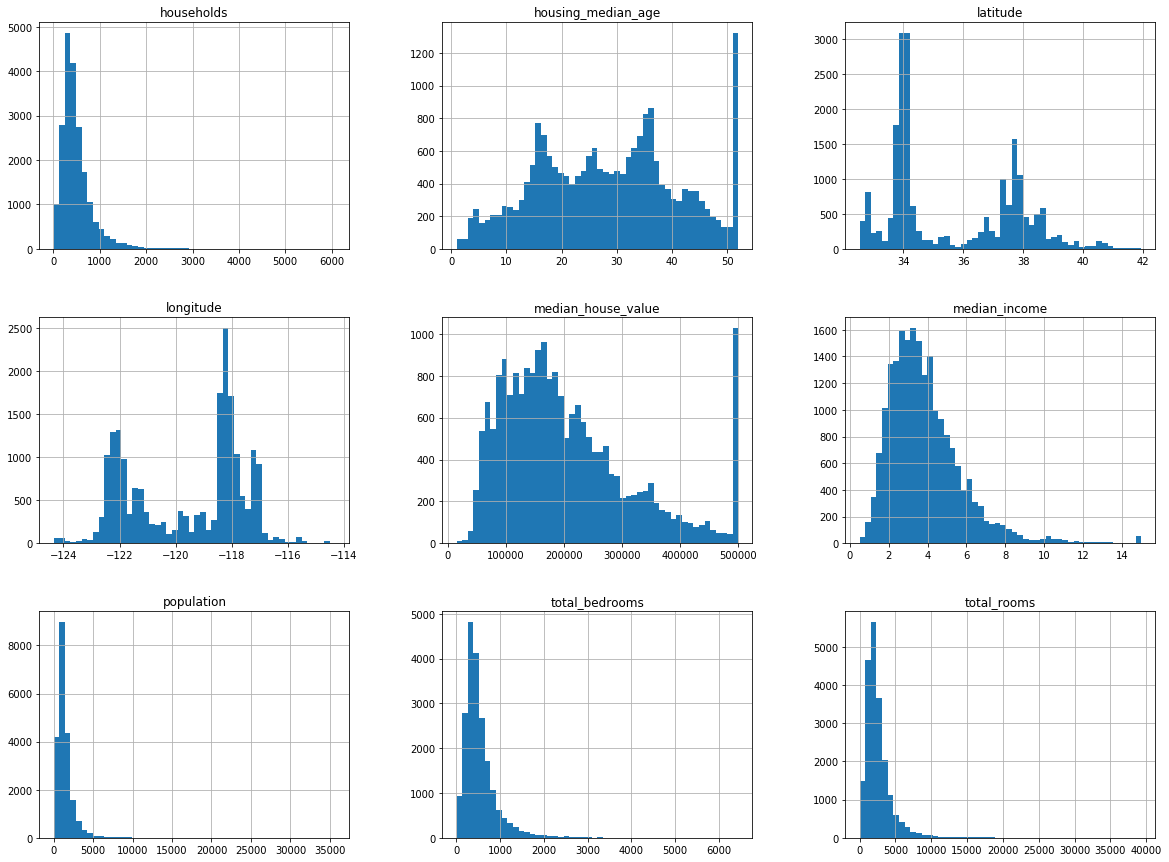

In [8]:
%matplotlib inline           
import matplotlib.pyplot as plt 
housing.hist(bins=50, figsize=(20, 15))

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [10]:
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
7        -122.25     37.84                52.0       3104.0           687.0   
8        -122.26     37.84                42.0       2555.0           665.0   
9        -122.25     37.84                52.0       3549.0           707.0   
10       -122.26     37.85                52.0       2202.0           434.0   
11       -122.26     37.85                52.0      

In [11]:
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [14]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [15]:
housing = strat_train_set.copy()

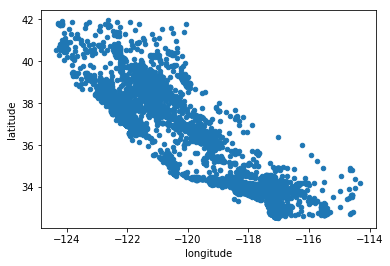

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude")

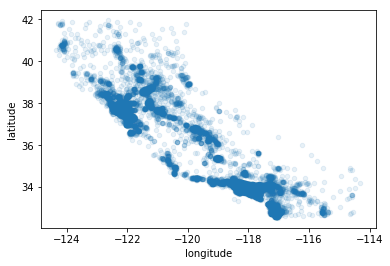

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [18]:
corr_matrix= housing.corr()

In [19]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [20]:
housing.corr()["median_income"].sort_values(ascending=False)

median_income         1.000000
median_house_value    0.687160
total_rooms           0.200087
households            0.010781
population            0.002380
total_bedrooms       -0.009740
longitude            -0.019583
latitude             -0.075205
housing_median_age   -0.111360
Name: median_income, dtype: float64

In [21]:
corr_matrix = housing.corr()


In [22]:
corr_matrix["median_income"].sort_values(ascending = False)

median_income         1.000000
median_house_value    0.687160
total_rooms           0.200087
households            0.010781
population            0.002380
total_bedrooms       -0.009740
longitude            -0.019583
latitude             -0.075205
housing_median_age   -0.111360
Name: median_income, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8C6492748>,
      dtype=object)

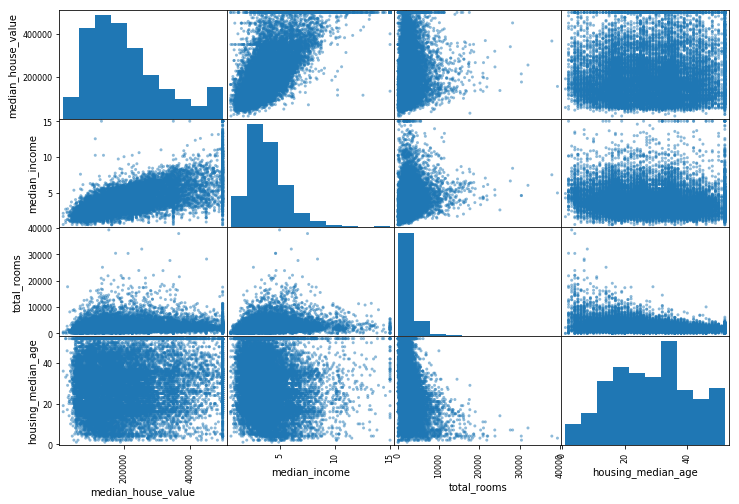

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))

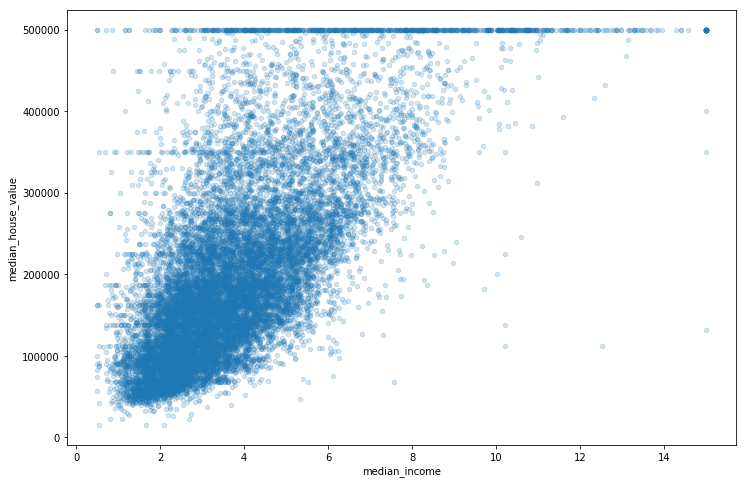

In [24]:
housing.plot(kind="scatter", x = "median_income", y = "median_house_value", alpha=0.2 , figsize=(12,8))

In [25]:
housing["room_per_household"] = housing["total_rooms"]/housing["households"]

In [26]:
housing["bedrooms_in_total_rooms"] = housing["total_bedrooms"]/housing["total_rooms"]

In [27]:
housing["population_per_household"] = housing["population"]/housing["households"]

In [28]:
import numpy as np
np.ceil(housing["room_per_household"])

17606     5.0
18632     7.0
14650     5.0
3230      6.0
3555      5.0
19480     6.0
8879      9.0
13685     6.0
4937      5.0
4861      3.0
16365     5.0
19684     5.0
19234     7.0
13956    17.0
2390      7.0
11176     5.0
15614     3.0
2953      5.0
13209     5.0
6569      6.0
5825      5.0
18086     8.0
16718     5.0
13600     7.0
13989     6.0
15168     5.0
6747      6.0
7398      4.0
5562      4.0
16121     6.0
         ... 
12380     7.0
5618      3.0
10060     7.0
18067     8.0
4471      4.0
19786     8.0
9969      6.0
14621     5.0
579       7.0
11682     5.0
245       5.0
12130     5.0
16441     6.0
11016     7.0
19934     5.0
1364      4.0
1236     12.0
5364      6.0
11703     7.0
10356     7.0
15270     7.0
3754      5.0
12166     7.0
6003      8.0
7364      5.0
6563      7.0
12053     5.0
13908     7.0
11159     6.0
15775     5.0
Name: room_per_household, Length: 16512, dtype: float64

In [29]:
housing["bedrooms_in_total_rooms"]


17606    0.223852
18632    0.159057
14650    0.241291
3230     0.200866
3555     0.231341
19480    0.200683
8879     0.141961
13685    0.143557
4937     0.249330
4861     0.444660
16365    0.228771
19684    0.256070
19234    0.148930
13956    0.230952
2390     0.166107
11176    0.228682
15614    0.462649
2953     0.202583
13209    0.222162
6569     0.173422
5825     0.252559
18086    0.130868
16718    0.213704
13600    0.162668
13989    0.218289
15168    0.228916
6747     0.196236
7398     0.273543
5562     0.214516
16121    0.202040
           ...   
12380    0.178372
5618     0.406780
10060    0.172370
18067    0.140475
4471     0.274166
19786    0.222222
9969     0.198786
14621    0.273342
579      0.167035
11682    0.254411
245      0.270270
12130    0.223285
16441    0.196390
11016    0.154290
19934    0.258104
1364     0.288136
1236     0.188366
5364     0.200295
11703    0.149775
10356    0.141909
15270    0.159690
3754     0.231965
12166    0.168149
6003     0.157193
7364     0

In [30]:
housing["population_per_household"]

17606     2.094395
18632     2.707965
14650     2.025974
3230      4.135977
3555      3.047847
19480     2.540351
8879      2.776173
13685     2.496000
4937      4.374429
4861     12.396313
16365     3.110353
19684     2.375494
19234     2.849802
13956     2.754967
2390      2.759907
11176     2.964587
15614     1.342404
2953      2.852941
13209     3.154822
6569      3.185874
5825      2.258216
18086     2.790493
16718     2.606780
13600     2.715328
13989     2.989101
15168     1.423469
6747      3.052533
7398      4.548969
5562      3.962963
16121     2.485075
           ...    
12380     2.327354
5618      3.000000
10060     2.673077
18067     2.698824
4471      4.050441
19786     2.459302
9969      2.185841
14621     3.286017
579       2.762963
11682     2.797595
245       3.014742
12130     3.083172
16441     2.633645
11016     3.019656
19934     2.180451
1364      1.800000
1236      2.412533
5364      2.149813
11703     3.685535
10356     3.348786
15270     3.073529
3754      3.

In [31]:
housing.corr()["median_income"].sort_values(ascending = False)

median_income               1.000000
median_house_value          0.687160
room_per_household          0.311563
total_rooms                 0.200087
population_per_household    0.021822
households                  0.010781
population                  0.002380
total_bedrooms             -0.009740
longitude                  -0.019583
latitude                   -0.075205
housing_median_age         -0.111360
bedrooms_in_total_rooms    -0.624674
Name: median_income, dtype: float64

In [32]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [33]:
#median = housing["total_bedrooms"].median()
#housing["total_bedrooms"].fillna(median, inplace=True)
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy = "median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [34]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [35]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [36]:
x = imputer.transform(housing_num)

In [37]:
housing_tr = pd.DataFrame(x, columns=housing_num.columns)

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_encoded
print(housing_cat_encoded.reshape(-1, 1))

In [40]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [41]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
Housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))

In [42]:
Housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
Housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [44]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

encoder = MyLabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)

In [45]:
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [46]:
from sklearn.base import BaseEstimator , TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[: , household_ix]
        population_per_household = X[: , population_ix] / X[: , household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[: , rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [47]:
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler

#num_pipeline = Pipeline([
#    ('imputer', Imputer(strategy="median")),
#    ('attribs_adder', CombinedAttributesAdder()),
#    ('std_scalar', StandardScaler()),
#])

#housing_num_tr = num_pipeline.fit_transform(housing_num)

In [48]:
from sklearn.base import BaseEstimator , TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [49]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999


In [50]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [51]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.base import TransformerMixin #gives fit_transform method for free
from sklearn.pipeline import Pipeline
from  sklearn.preprocessing import StandardScaler

class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)
    
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scalar', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
])

In [52]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list = [
    ("num_pipeline", num_pipeline),
    ("cat_pipelie", cat_pipeline),
])



In [53]:
housing_prepared = full_pipeline.fit_transform(housing)

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg =  DecisionTreeRegressor()

tree_reg.fit(housing_prepared, housing_labels)

housing_prediction = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_prediction)
tree_rmse = np.sqrt(tree_mse)


In [55]:
tree_rmse

0.0

In [56]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

tree_rmse_score = np.sqrt(-score)

In [57]:
tree_rmse_score

array([68577.81951693, 67657.05112727, 70287.41540405, 68954.88638719,
       71334.89679726, 73615.60582346, 70217.17195492, 71356.32689233,
       76368.02687679, 70649.36995581])

In [58]:
def display(tree_rmse_score):
    print("Score : ", tree_rmse_score)
    print("Mean_ Score : ", tree_rmse_score.mean())
    print("Standard Deviation : ", tree_rmse_score.std())
    
display(tree_rmse_score)

Score :  [68577.81951693 67657.05112727 70287.41540405 68954.88638719
 71334.89679726 73615.60582346 70217.17195492 71356.32689233
 76368.02687679 70649.36995581]
Mean_ Score :  70901.85707360259
Standard Deviation :  2413.8807734159504


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()

score = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error",cv=10)

lin_reg_rmse = np.sqrt(-score) 

display(lin_reg_rmse)



Score :  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean_ Score :  69052.46136345083
Standard Deviation :  2731.6740017983425


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators' : [3, 10, 30], 'max_features' : [2, 4, 6, 8]}, {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features' : [2, 3, 4]},]

forest_reg = RandomForestRegressor()
grid_search  = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

#grid_search.best_params_

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [61]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63000.707978181905 {'max_features': 2, 'n_estimators': 3}
55409.89316924329 {'max_features': 2, 'n_estimators': 10}
53017.579874228504 {'max_features': 2, 'n_estimators': 30}
60338.49153141338 {'max_features': 4, 'n_estimators': 3}
53239.02752971895 {'max_features': 4, 'n_estimators': 10}
50545.58407077208 {'max_features': 4, 'n_estimators': 30}
58655.60682488352 {'max_features': 6, 'n_estimators': 3}
51763.7476713806 {'max_features': 6, 'n_estimators': 10}
49875.000664264786 {'max_features': 6, 'n_estimators': 30}
58666.34388016855 {'max_features': 8, 'n_estimators': 3}
52281.875613548626 {'max_features': 8, 'n_estimators': 10}
50045.224860726245 {'max_features': 8, 'n_estimators': 30}
63275.12831437198 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53962.92434587578 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59106.926540981774 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52434.64245790888 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [62]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.29663192e-02, 6.58389596e-02, 4.07762790e-02, 1.73753908e-02,
       1.75245985e-02, 1.76995833e-02, 1.61148250e-02, 3.18825948e-01,
       6.61932628e-02, 1.08667503e-01, 7.73598556e-02, 1.39433172e-02,
       1.59560647e-01, 4.43855590e-05, 2.41373344e-03, 4.69539076e-03])

In [63]:
#from sklearn.preprocessing import LabelBinarizer
#encoderer = LabelBinarizer()
#encoderer.fit([])
#extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_one_hot_attribs = list(encoderer.classes_)
#attributes = num_attribs + extra_attribs + cat_one_hot_attribs
#sorted(zip(feature_importances, attributes), reverse = True)


In [64]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [65]:
final_rmse

47385.30911000398

In [66]:
#from sklearn.svm import SVR
#from sklearn.model_selection import cross_val_score

#lin_reg = SVR(kernel='poly', gamma=4)

#score = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error",cv=10)

#lin_reg_rmse = np.sqrt(-score) 

#display(lin_reg_rmse)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.svm import SVR


param_distribs = {
    'kernel' : ['linear', 'rbf'],
    'C' : reciprocal(20, 200000),
    'gamma' : expon(scale = 1.0),
}

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions = param_distribs, n_iter = 50, cv=5, scoring='neg_mean_squared_error', verbose = 2, n_jobs = 4, random_state = 42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
rnd_search